<a href="https://colab.research.google.com/github/HowardHNguyen/Data_Science_for_Marketing_Solutions/blob/main/EDA_Bivariate_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Bivariate analysis uncovers insights embedded within two variables of interest. When performing this analysis, we are typically interested in how these two variables are distributed or related. Bivariate analysis can sometimes be more complex than univariate analysis because it involves the analysis of categorical and (or) numerical values. This means that in bivariate analysis, we can have three possible combinations of variables namely: numerical-numerical, numerical-categorical, and categorical-categorical.

It is important to understand the various chart options that cater to these combinations. These chart options can help us understand the underlying distribution of our data and identify any hidden patterns within the dataset.

## Preparing data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
penguins_data = pd.read_csv("/content/drive/MyDrive/_Python/Exploratory-Data-Analysis-with-Python/Ch5/Data/penguins_size.csv")
penguins_data.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [5]:
penguins_data.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [11]:
penguins_bm = penguins_data[['species', 'culmen_length_mm', 'body_mass_g']]
penguins_bm

,species,culmen_length_mm,body_mass_g
0,Adelie,39.1,3750.0
1,Adelie,39.5,3800.0
2,Adelie,40.3,3250.0
3,Adelie,NaN,NaN
4,Adelie,36.7,3450.0
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,46.8,4850.0
341,Gentoo,50.4,5750.0
342,Gentoo,45.2,5200.0


A scatter plot clearly represents the relationship between two numerical variables. The numerical variables are plotted on the x and y axes, and the values plotted typically reveal a pattern. This pattern on a scatter plot can provide insights into the strength and direction of the relationship between the two variables. This could either be positive (i.e., as one variable increases, the other variable increases) or negative (i.e., as one variable increases, the other variable decreases).

<Axes: xlabel='culmen_length_mm', ylabel='body_mass_g'>

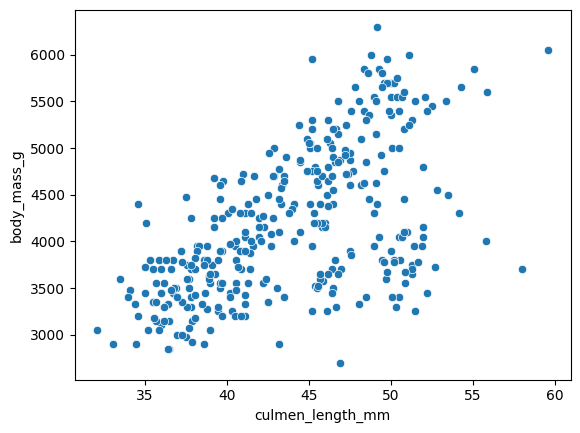

In [12]:
# Create a scatterplot in Seaborn
sns.scatterplot(data = penguins_bm, x= penguins_data["culmen_length_mm"], y= penguins_bm['body_mass_g'])

Text(0.5, 1.0, 'Bivariate analysis of Culmen Length and body mass')

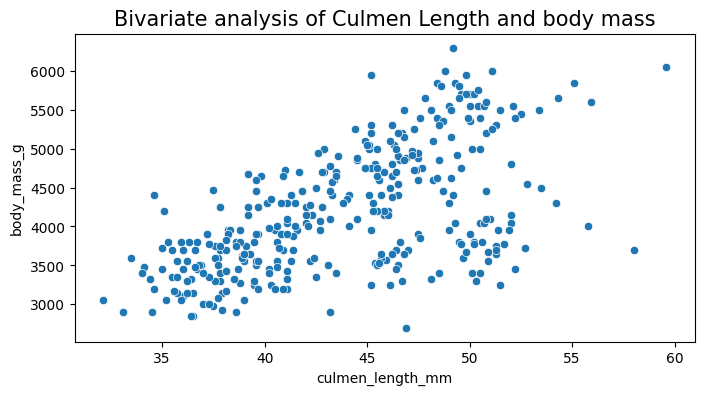

In [13]:
# Set the chart size and chart title
plt.figure(figsize= (8,4))
ax = sns.scatterplot(data = penguins_bm, x= penguins_bm["culmen_length_mm"], y= penguins_bm['body_mass_g'])
ax.set_title('Bivariate analysis of Culmen Length and body mass', fontsize= 15)

In [15]:
# Subset for relevant columns
penguins_sx = penguins_data[['species','culmen_length_mm','sex']]
penguins_sx

,species,culmen_length_mm,sex
0,Adelie,39.1,MALE
1,Adelie,39.5,FEMALE
2,Adelie,40.3,FEMALE
3,Adelie,NaN,NaN
4,Adelie,36.7,FEMALE
...,...,...,...
339,Gentoo,NaN,NaN
340,Gentoo,46.8,FEMALE
341,Gentoo,50.4,MALE
342,Gentoo,45.2,FEMALE


A crosstab displays the relationship between categorical variables in a matrix format. The rows of the crosstab are typically the categories within the first categorical variable, while the columns are the categories of the second categorical variable. The values within the crosstab are either the frequency of occurrence or the percentage of occurrence. It is also known as a two-way table or contingency table. With the crosstab, we can easily uncover trends and patterns, especially as they relate to specific categories within our dataset.

In [17]:
# Create a Crosstab in Pandas
pd.crosstab(index= penguins_sx['species'], columns= penguins_sx['sex'])

sex,FEMALE,MALE
species,,
Adelie,73,73
Chinstrap,34,34
Gentoo,58,62


A pivot table summarizes our dataset by grouping and aggregating variables within the dataset. Some of the aggregation functions within the pivot table include a sum, count, average, minimum, maximum, and so on. For bivariate analysis, the pivot table can be used for categorical-numerical variables. The numerical variable is aggregated for each category in the categorical variable.

The name pivot table has its origin in spreadsheet software. The summary provided by a pivot table can easily uncover meaningful insights from a large dataset.

In [19]:
# Create a Pivot Table in Pandas
pd.pivot_table(penguins_sx, values='culmen_length_mm', index='species', aggfunc=np.mean)

<ipython-input-19-4a4739cf19d7>:2: FutureWarning: The provided callable <function mean at 0x7a0fba9154e0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  pd.pivot_table(penguins_sx, values='culmen_length_mm', index='species', aggfunc=np.mean)


,culmen_length_mm
species,
Adelie,38.791391
Chinstrap,48.833824
Gentoo,47.504878


In [20]:
# Subset for relevant columns
penguins_bm_sx = penguins_data[['species','culmen_length_mm','body_mass_g','sex']]

In [21]:
penguins_bm_sx

,species,culmen_length_mm,body_mass_g,sex
0,Adelie,39.1,3750.0,MALE
1,Adelie,39.5,3800.0,FEMALE
2,Adelie,40.3,3250.0,FEMALE
3,Adelie,NaN,NaN,NaN
4,Adelie,36.7,3450.0,FEMALE
...,...,...,...,...
339,Gentoo,NaN,NaN,NaN
340,Gentoo,46.8,4850.0,FEMALE
341,Gentoo,50.4,5750.0,MALE
342,Gentoo,45.2,5200.0,FEMALE


The pairplot provides a visual representation of the distribution of single variables and the relationship between two variables. The pairplot isn’t just one plot but a group of subplots that display single variables (numerical or categorical) and two variables (numerical-numerical and categorical-numerical). A pairplot combines charts such as histograms, density plots, and scatter plots to represent the variables in the dataset. It provides a simple way to view the distribution and relationship across multiple variables in our dataset.

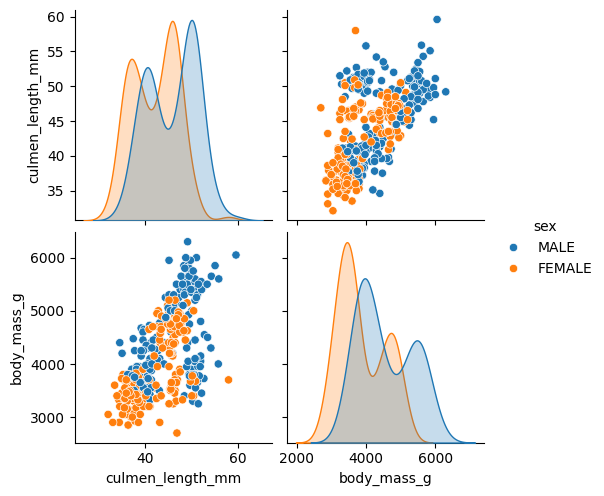

In [22]:
# create a pairplots in seaborn
sns.pairplot(penguins_bm_sx, hue= 'sex')

The bar chart can be used for both univariate and bivariate analysis. For bivariate analysis, the x axis typically represents the categories in our dataset, while the y axis represents a numerical variable. This means the bar chart is usually used for categorical-numerical analysis. The numerical variable is typically aggregated using functions such as the sum, median, mean, and so on. A bar chart provides quick insights, especially when we need to quickly compare categories within our dataset.

In this recipe, we will explore how to create bar charts for bivariate analysis in seaborn. seaborn has a barplot function that is used for this. seaborn also has a countplot function that plots a bar chart; however, the countplot function only plots the count of each category. Therefore, it is used for univariate analysis. The barplot function, on the other hand, plots a numerical variable against each category.

Text(0.5, 1.0, 'Bivariate analysis of Culmen Length and Species')

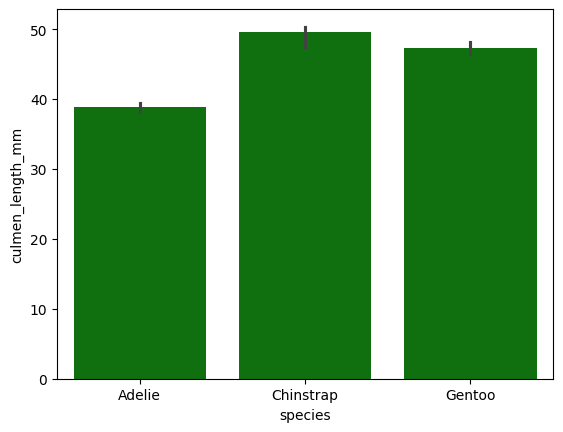

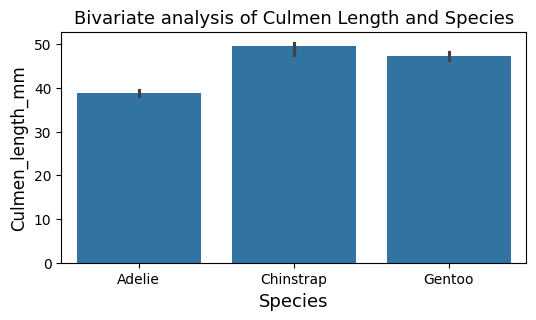

In [27]:
# Create a Bar chart in Seaborn
sns.barplot(data = penguins_sx,x=penguins_sx['species'],y=penguins_sx['culmen_length_mm'],estimator = np.median, color='green')

# Set the chart size and chart title. Also specify the axes label names and label sizes
plt.figure(figsize= (6,3))

ax = sns.barplot(data = penguins_data,x=penguins_data['species'],y=penguins_data['culmen_length_mm'],estimator = np.median)
ax.set_xlabel('Species',fontsize = 13)
ax.set_ylabel('Culmen_length_mm', fontsize = 12)
ax.set_title('Bivariate analysis of Culmen Length and Species', fontsize= 13)

A boxplot can be used for univariate analysis and bivariate analysis. When analyzing two variables, a boxplot is useful for analyzing numerical-categorical variables. Just like in univariate analysis, the boxplot also gives us a sense of the underlying distribution of a continuous variable through five key metrics. However, in bivariate analysis, the distribution of the continuous variable is displayed across each category of the categorical variable of interest. The five key metrics include the minimum, first quartile, median, third quartile, and maximum. These metrics give insights into the spread of our dataset and possible outliers.

Text(0.5, 1.0, 'Bivariate analysis of Culmen Length and Species')

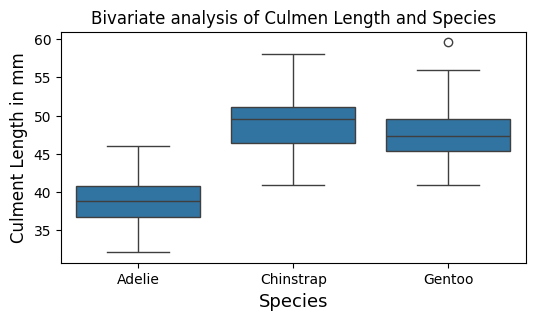

In [29]:
# Set the chart size and chart title. Also specify the axes label names and label sizes
plt.figure(figsize= (6,3))

ax = sns.boxplot( data = penguins_data, x= penguins_data['species'] ,  y= penguins_data["culmen_length_mm"])
ax.set_xlabel('Species',fontsize = 13)
ax.set_ylabel('Culment Length in mm', fontsize = 12)
ax.set_title('Bivariate analysis of Culmen Length and Species', fontsize= 12)

Just like a boxplot, a histogram can also be used for univariate analysis and bivariate analysis. For bivariate analysis, a histogram is useful for analyzing numerical-categorical variables. It is usually straightforward when our categorical variable has only two categories. However, it becomes complex when we have more than two categories. Typically, in bivariate analysis using histograms, we can overlay the histogram for each of the categories over each other and assign a specific color to the histogram representing each category. This helps us to easily identify distinct distributions of our continuous variable across categories in our categorical variable of interest. This approach is best only for categorical variables with at most three categories.

<Axes: xlabel='culmen_length_mm', ylabel='Count'>

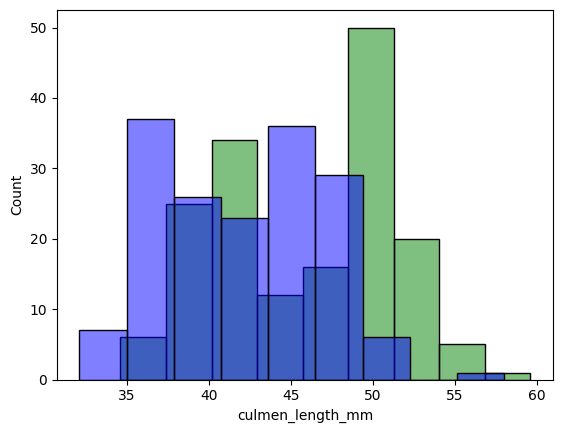

In [34]:
# Create a histogram in Seaborn
penguins_data_male = penguins_data.loc[penguins_data['sex']== 'MALE',:]
penguins_data_female = penguins_data.loc[penguins_data['sex']== 'FEMALE',:]

sns.histplot( data = penguins_data_male, x= penguins_data_male["culmen_length_mm"], alpha=0.5, color = 'green')
sns.histplot( data = penguins_data_female, x= penguins_data_female["culmen_length_mm"], alpha=0.5, color = 'blue')

Text(0.5, 1.0, 'Bivariate analysis of Culmen Length and Sex')

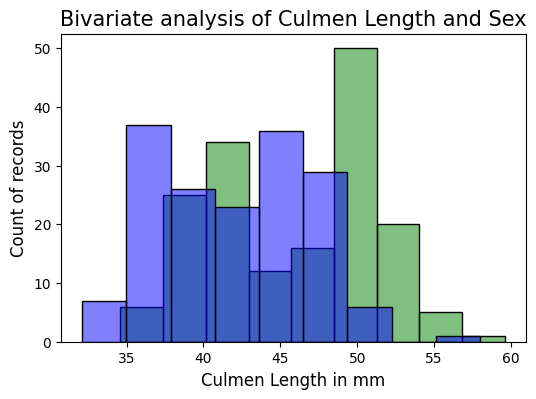

In [33]:
# Set the chart size and chart title. Also specify the axes label names and label sizes
plt.figure(figsize= (6,4))

ax = sns.histplot( data = penguins_data_male, x= penguins_data_male["culmen_length_mm"], alpha=0.5, color = 'green')
ax = sns.histplot( data = penguins_data_female, x= penguins_data_female["culmen_length_mm"], alpha=0.5, color = 'blue')

ax.set_xlabel('Culmen Length in mm',fontsize = 12)
ax.set_ylabel('Count of records', fontsize = 12)
ax.set_title('Bivariate analysis of Culmen Length and Sex', fontsize= 15)

In [37]:
penguins_bm.head()

,species,culmen_length_mm,body_mass_g
0,Adelie,39.1,3750.0
1,Adelie,39.5,3800.0
2,Adelie,40.3,3250.0
3,Adelie,NaN,NaN
4,Adelie,36.7,3450.0


In [38]:
penguins_bm.dtypes

,0
species,object
culmen_length_mm,float64
body_mass_g,float64


Correlation measures the strength of the relationship between two numerical variables. The strength is usually within a range of -1 and +1. -1 is a perfect negative linear correlation, while +1 is a perfect positive linear correlation, and 0 means no correlation. Correlation uncovers hidden patterns and insights in our dataset. In the case of a positive correlation, when one variable increases, the other also increases, and in the case of a negative correlation, when one variable increases, the other decreases.

In addition, a high correlation (a high correlation value) means there is a strong relationship between the two variables, while a low correlation means there is a weak relationship between the variables. It is important to note that correlation doesn’t mean causation.

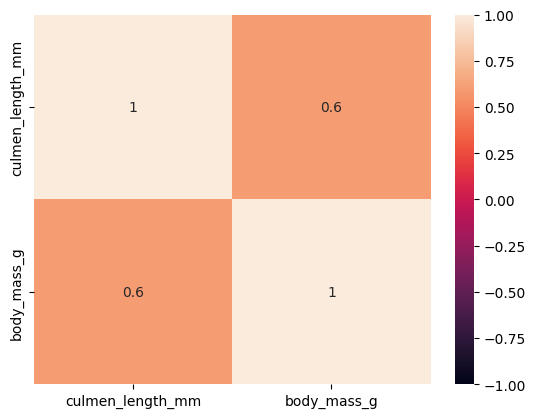

In [40]:
# Create a Correlation Heatmap in Seaborn
penguins_corr = penguins_bm[['culmen_length_mm','body_mass_g']].corr()
heatmap = sns.heatmap(penguins_corr, vmin=-1, vmax=1, annot=True)

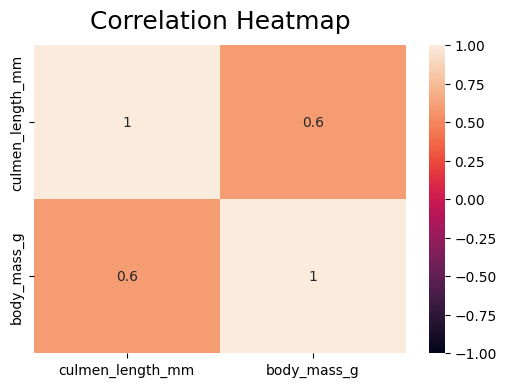

In [43]:
# Set the chart size and chart title. Also set a padding value to define the distance of the title from the top of the heatmap
plt.figure(figsize=(6, 4))
heatmap = sns.heatmap(penguins_bm[['culmen_length_mm','body_mass_g']].corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);